In [1]:
import sys
sys.path.append('../')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
from systematics_module import *
import os

%matplotlib inline

%load_ext autoreload
%autoreload 2

input_path = '/users/PCON0003/warner785/DMASSy3/systematics/pca_SP107_SPT_v2_cformat/'
#y3/band_z/
input_keyword = 'pc0'
sysMap = io.SearchAndCallFits(path = input_path, keyword = input_keyword)
print(sysMap)

In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.



Calling catalogs >>>
pc0_SP107_SPT_v2_cformat_4096ring.fits.gz
reading 1/1 /users/PCON0003/warner785/DMASSy3/systematics/pca_SP107_SPT_v2_cformat/pc0_SP107_SPT_v2_cformat_4096ring.fits.gz
[(167747584,  5.10530658) (167731200,  1.01238584)
 (167714816,  0.29834569) ... (165009364, 11.64403223)
 (165025709,  3.71789272) (165025708,  4.21633824)]


In [2]:
loadings = np.load('/fs/scratch/PCON0008/warner785/bwarner/loadings.npy',allow_pickle=True)
#print(loadings)

variables = np.load('/fs/scratch/PCON0008/warner785/bwarner/variables.npy',allow_pickle=True)
print(variables)

['airmass_maxg' 'airmass_maxi' 'airmass_maxr' 'airmass_maxz'
 'airmass_ming' 'airmass_mini' 'airmass_minr' 'airmass_minz' 'airmassg'
 'airmassi' 'airmassr' 'airmassz' 'exptimeg' 'exptimei' 'exptimer'
 'exptimez' 'fgcm_gry_ming' 'fgcm_gry_mini' 'fgcm_gry_minr'
 'fgcm_gry_minz' 'fgcm_gryg' 'fgcm_gryi' 'fgcm_gryr' 'fgcm_gryz'
 'fwhm_fluxrad_maxg' 'fwhm_fluxrad_maxi' 'fwhm_fluxrad_maxr'
 'fwhm_fluxrad_maxz' 'fwhm_fluxrad_ming' 'fwhm_fluxrad_mini'
 'fwhm_fluxrad_minr' 'fwhm_fluxrad_minz' 'fwhm_fluxradg' 'fwhm_fluxradi'
 'fwhm_fluxradr' 'fwhm_fluxradz' 'fwhm_maxg' 'fwhm_maxi' 'fwhm_maxr'
 'fwhm_maxz' 'fwhm_ming' 'fwhm_mini' 'fwhm_minr' 'fwhm_minz' 'fwhmg'
 'fwhmi' 'fwhmr' 'fwhmz' 'magauto_depthg' 'magauto_depthi'
 'magauto_depthr' 'magauto_depthz' 'maglimg' 'maglimi' 'maglimr' 'maglimz'
 'sfd98' 'sigma_mag_zerog' 'sigma_mag_zeroi' 'sigma_mag_zeror'
 'sigma_mag_zeroz' 'skybriteg' 'skybritei' 'skybriter' 'skybritez'
 'skyvar_maxg' 'skyvar_maxi' 'skyvar_maxr' 'skyvar_maxz' 'skyvar_ming'
 'skyva

In [3]:
print(variables.size)

107


In [3]:
#you can take each row of loadings.npy and find the elements with the largest absolute values and 
#list a few of them. That way you can say things like PCA0 is X% this map and Y% that map, and Z% everything else
import sys
sys.path.append('/users/PCON0003/warner785/lss_sys/')

import lsssys.config

spconfig = lsssys.config.sysmap_shortnames_2col_format_Y3 #dictionary 
# other dictionary needed as well for different file format

#get missing files from nersc
#spconfig['airmass']

Reading config file
Working with Y3
skymapper not found, some visualisation tools won't work


In [4]:
#for shortname in variables:
#    systype = shortname[:-1]
#    band = shortname[-1]
#    syspath = path_sys.format(band=band) + spconfig[systype]['filename']
    
# edit:
path_sys = '/fs/scratch/PCON0003/warner785/bwarner/band_{band}/'
for shortname in variables:
    systype = shortname[:-1]
    band = shortname[-1]

    if systype in spconfig.keys():
        syspath = path_sys.format(band=band) + spconfig[systype]['filename']
        
print(syspath)

/fs/scratch/PCON0003/warner785/bwarner/band_z/y3a2_{band}_o.4096_t.32768_T_EFF.WMEAN_EQU.fits.gz


In [7]:
#pc0_coeff = loadings[0,:]
#sysmap_list = [<loaded sysmap 1>, <loaded sysmap 2>, ….]

a = loadings[0,:]  
s = np.argsort(a)
largest5index = s[-5:]
largest_negative = s[:5]
n = np.argsort(np.abs(a))
neg_pos_5index = n[-5:]

largest5names = np.array(variables)[largest5index]
largest5coeff = a[largest5index]
largest_sq = largest5coeff**2

largest5_neg_names = np.array(variables)[largest_negative]
largest5_neg_coeff = a[largest_negative]
largest_neg_sq = largest5_neg_coeff**2

largest5_total_names = np.array(variables)[neg_pos_5index]
largest5_total_coeff = a[neg_pos_5index]
largest_total_sq = largest5_total_coeff**2 # actual percentage

print("positive coeff: \n", np.transpose([largest5names, largest5coeff, largest_sq]))
print("negative coeff: \n", np.transpose([largest5_neg_names, largest5_neg_coeff, largest_neg_sq]))
print("absolute val coeff: \n", np.transpose([largest5_total_names, largest5_total_coeff, largest_total_sq]))

positive coeff: 
 [['skyvar_minr' 0.11789219016019943 0.013898568500768623]
 ['skyvar_uncertz' 0.1648317734541665 0.027169513540045667]
 ['skyvar_uncertg' 0.1758257687495787 0.030914700956380325]
 ['skyvar_uncerti' 0.17902987831923148 0.03205169733099883]
 ['skyvar_uncertr' 0.18507594904552038 0.03425310691510006]]
negative coeff: 
 [['sof_depthi' -0.19258149634646715 0.03708763273504434]
 ['maglimr' -0.18955791858444884 0.03593220449806853]
 ['sof_depthr' -0.1883711904553456 0.03548370539356408]
 ['magauto_depthr' -0.18546525804684877 0.0343973619423842]
 ['maglimi' -0.18368450250720647 0.03373999646131994]]
absolute val coeff: 
 [['skyvar_uncertr' 0.18507594904552038 0.03425310691510006]
 ['magauto_depthr' -0.18546525804684877 0.0343973619423842]
 ['sof_depthr' -0.1883711904553456 0.03548370539356408]
 ['maglimr' -0.18955791858444884 0.03593220449806853]
 ['sof_depthi' -0.19258149634646715 0.03708763273504434]]


(array([18.,  2.,  7., 12., 18., 18., 18.,  9.,  1.,  4.]),
 array([-0.1925815 , -0.15481575, -0.11705001, -0.07928426, -0.04151852,
        -0.00375277,  0.03401297,  0.07177872,  0.10954446,  0.1473102 ,
         0.18507595]),
 <a list of 10 Patch objects>)

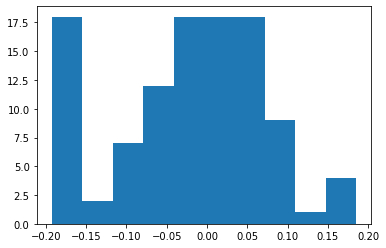

In [8]:
# first few sp maps for each pca: qual. statements 

#save numbers into document for reference

# all the coefficents 
plt.hist(a)

In [1]:
import scipy.stats
scipy.stats.chi2(12)

In [16]:
scipy.stats.chi2(12).cdf(2.5*12)
#Out[4]: 0.997207570667299
1.-scipy.stats.chi2(12).cdf(2.5*12)
#Out[5]: 0.002792429332700963
100*(1.-scipy.stats.chi2(12).cdf(2.5*12))
#Out[6]: 0.2792429332700963
chi2 = np.linspace(0,30,100)
y = np.abs((100*(1.-scipy.stats.chi2(12).cdf(chi2))-5.))  #for 5% p-value threshold
index = np.where(y == y.min())[0][0]
chi2[index]
#Out[26]: 20.90909090909091
chi2[index]/12
#Out[29]: 1.7424242424242424

0.0

In [17]:
chi2 = [1, 1.5, 2.5, 0.5, 3]
p_val = 1.-scipy.stats.chi2(5).cdf(chi2)
print(p_val)

[0.96256577 0.91306981 0.77649507 0.99212329 0.69998584]


In [18]:
import numpy as np
y = np.abs(100*(p_val - 5.))
print(y)

[403.74342268 408.69301855 422.35049289 400.78767068 430.00141641]


In [19]:
index = np.where(y == y.max())[0][0]
print(index)

4


In [ ]:
y = np.abs((100*(1.-scipy.stats.chi2(12).cdf(chi2))-5.))  #for 5% p-value threshold
index = np.where(y == y.min())[0][0]
threshold = chi2[index]/12
print(threshold)
if threshold > 2: